# MAT281 - Laboratorio N°10



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




### 1.-

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* Se tiene que los datos entregados son de dos tipos, enteros (2) y flotantes (30). Además, este conjunto representa un uso de memoria de 142.4 KB.

In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

* No se presentan valores nulos en el conjunto de datos

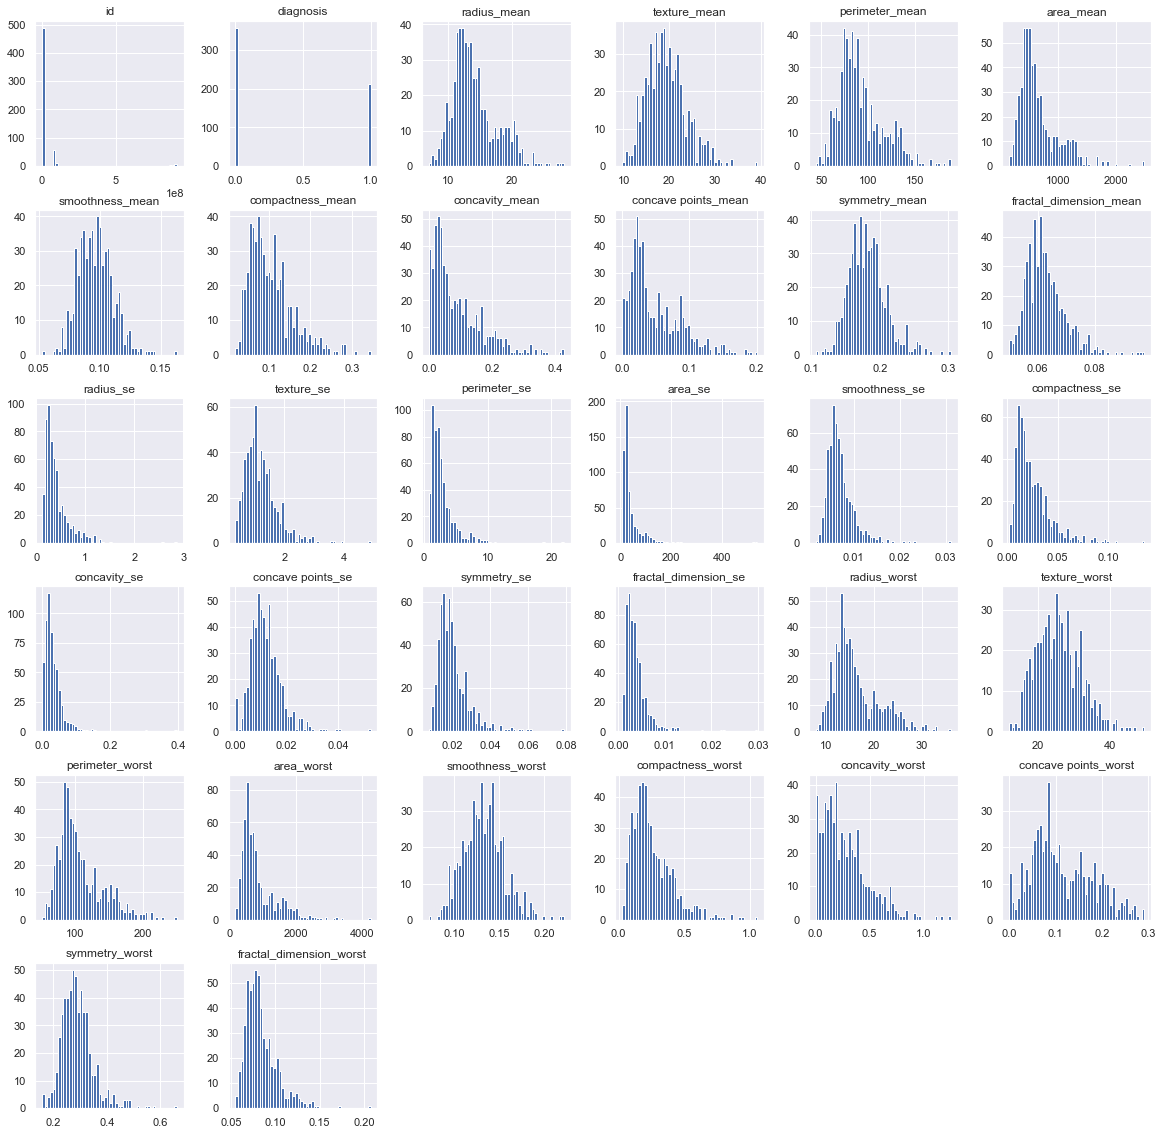

In [7]:
df.hist(bins = 50, figsize= (20,20))
plt.show()

* Se observa que gran parte de conjunto de datos presenta una distribución del tipo normal

### 2.-
**Se decido mantener el id y diagnosis sin normalizar**

In [39]:
import pandas as pd    
from sklearn.preprocessing import StandardScaler
col = df.columns[2:]

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df[list(col)]),columns = col)
df_scaled = pd.concat([df[list(df.columns[:2])], df_scaled], axis=1)
df_scaled.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### 3.-
Realizar un método de reducción de dimensionalidad visto en clases.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [49]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA()) # se realiza la normalización para todos los datos.
pca_pipe.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [51]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9','PC10',
              'PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18','PC19','PC20',
              'PC21', 'PC22', 'PC23', 'PC24','PC25', 'PC26', 'PC27', 'PC28','PC29','PC30',
              'PC31', 'PC32']
)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
PC1,0.022013,0.216836,0.216404,0.103706,0.224541,0.218007,0.137491,0.231311,0.251115,0.255161,...,0.225597,0.105058,0.233636,0.222022,0.125188,0.204288,0.222927,0.246161,0.120461,0.126524
PC2,-0.032368,-0.077035,-0.226045,-0.058587,-0.207125,-0.222897,0.189042,0.158967,0.068175,-0.026702,...,-0.212408,-0.045164,-0.192094,-0.211595,0.172729,0.148267,0.103591,-0.001785,0.142765,0.276795
PC3,0.097903,-0.104562,-0.000271,0.057256,-0.000892,0.037809,-0.101731,-0.067796,0.009542,-0.019013,...,-0.039210,-0.050352,-0.039889,-0.002394,-0.257203,-0.229456,-0.165984,-0.162802,-0.271611,-0.229383
PC4,0.027300,0.098214,-0.051257,0.599487,-0.052045,-0.061834,-0.149217,-0.040524,-0.028097,-0.070732,...,-0.024516,0.627975,-0.023827,-0.033993,-0.010667,0.075525,0.058062,-0.016847,0.035909,0.067294
PC5,-0.009117,-0.080680,0.042020,-0.020158,0.041831,0.014292,-0.367699,0.017037,0.089721,-0.041380,...,0.001651,-0.060463,0.014025,-0.021243,-0.321004,0.133442,0.197066,0.048980,-0.235423,0.101783
PC6,0.316310,0.005288,-0.029793,0.030418,-0.028623,-0.006413,0.261919,0.004499,0.002251,0.034264,...,-0.004876,0.044032,-0.013302,0.023557,0.364404,-0.034475,-0.018082,0.029356,-0.452128,0.092201
PC7,0.906762,-0.028818,-0.041255,0.019096,-0.042348,-0.027189,-0.137560,-0.042472,-0.031721,-0.080222,...,-0.014912,-0.004676,-0.012529,0.001915,-0.064929,0.053367,0.035847,-0.020216,0.235544,0.036969
PC8,-0.099014,-0.145998,-0.105531,0.018122,-0.094321,-0.035776,-0.099449,0.061094,-0.090455,-0.122745,...,-0.000748,0.025191,0.010757,0.075227,-0.108297,0.142236,-0.061912,-0.158853,-0.041253,0.362993
PC9,-0.150360,0.198361,0.016627,0.061302,0.005334,0.049416,-0.303182,-0.128519,-0.095406,-0.137329,...,0.057153,-0.010226,0.042817,0.080026,0.155876,0.098840,0.027892,-0.057440,0.182309,0.114979
PC10,-0.158620,0.076739,-0.232560,0.100103,-0.235151,-0.198613,-0.056163,-0.200352,0.028392,-0.141259,...,-0.105098,0.097280,-0.104645,-0.071884,0.152487,-0.074612,0.188064,0.054002,0.091539,-0.104132


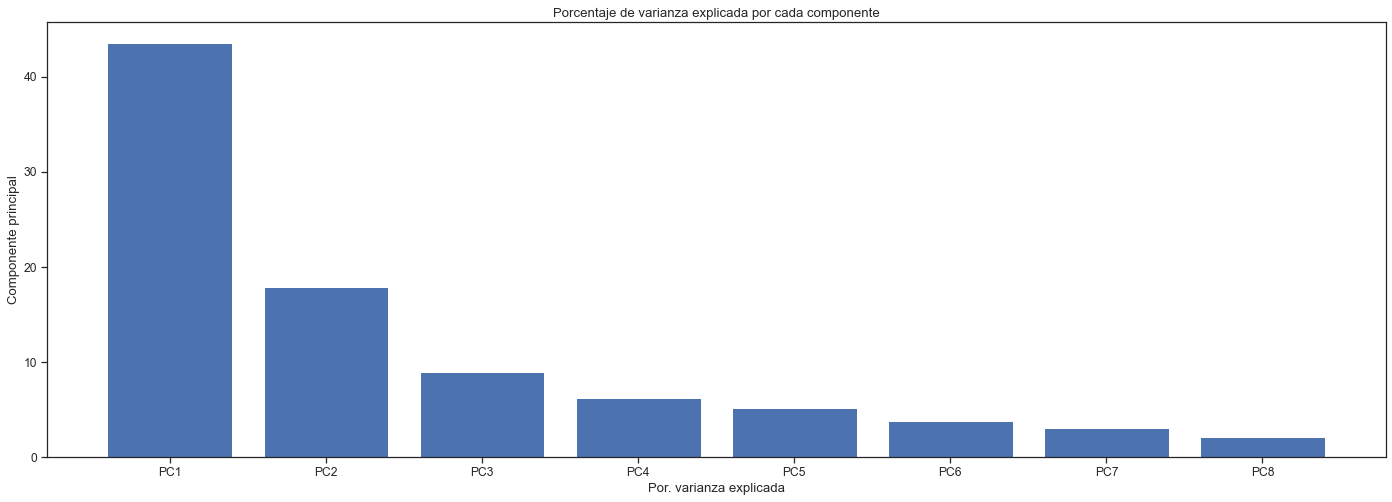

In [53]:
# graficar varianza por componente
cant = 8 # Cantidad de gráficos de barra que se desean mostrar (El total es de 64)
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9','PC10',
              'PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18','PC19','PC20',
              'PC21', 'PC22', 'PC23', 'PC24','PC25', 'PC26', 'PC27', 'PC28','PC29','PC30',
              'PC31', 'PC32']

plt.figure(figsize=(24,8))
plt.bar(x= range(1,cant+1), height=percent_variance[0:cant], tick_label=columns[0:cant])
plt.xticks(np.arange(cant) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

Se aprecia que la primera componentes consegue explicar el 43.51% de la varianza observada. Siendo la componente que más aporta.

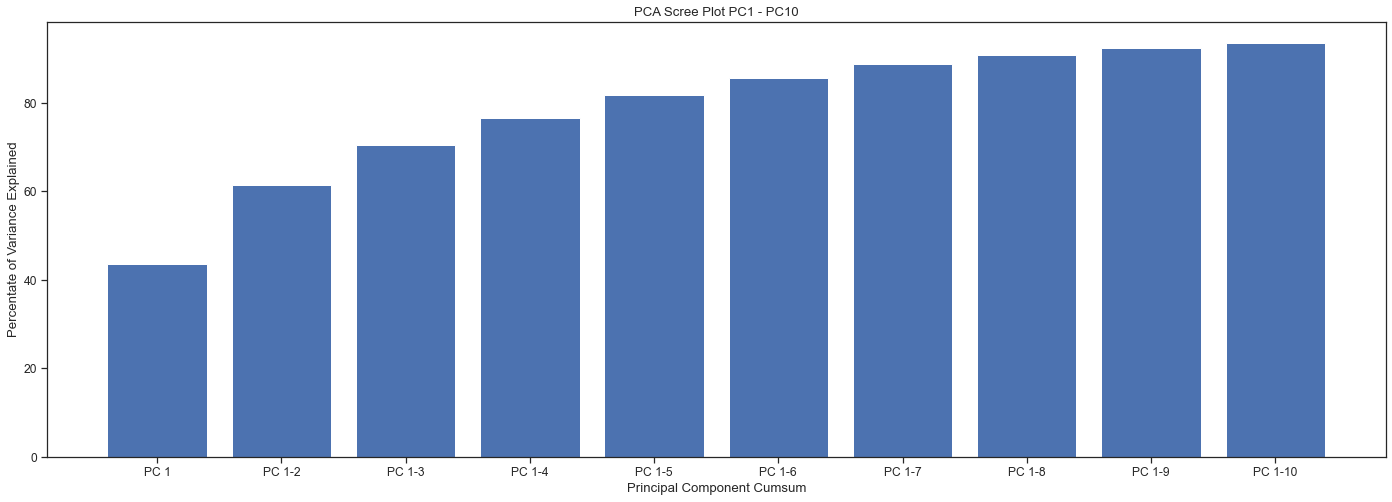

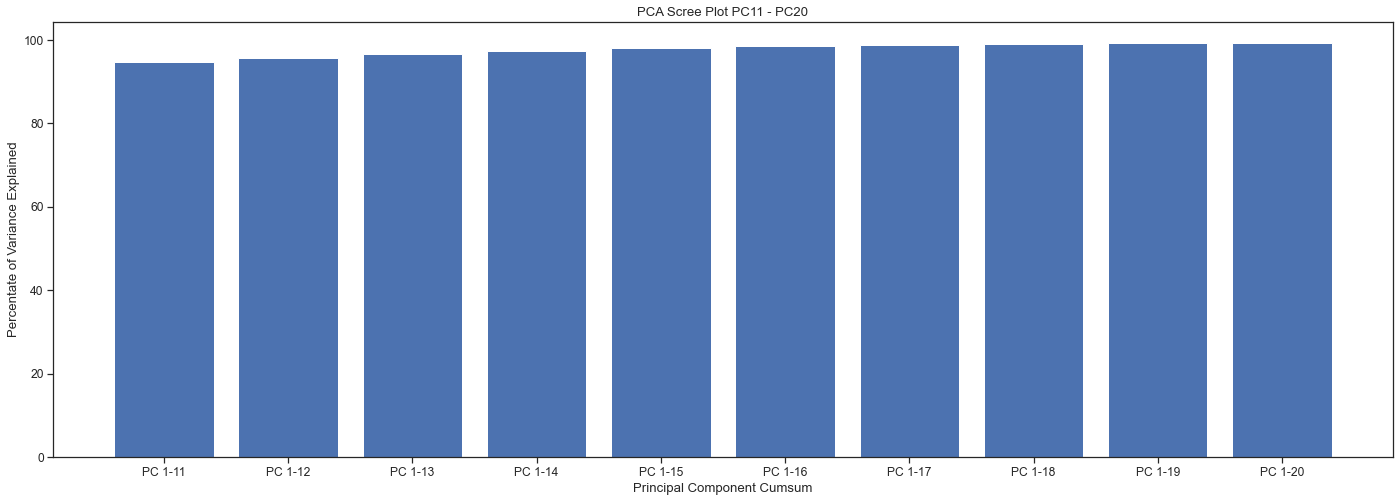

Las probabilidades acumuladas son: 

[ 43.51  61.42  70.37  76.62  81.8   85.66  88.72  90.85  92.32  93.58
  94.67  95.62  96.53  97.35  98.01  98.47  98.75  99.    99.18  99.34
  99.49  99.59  99.68  99.77  99.85  99.9   99.95  99.98 100.   100.
 100.   100.  ]


In [54]:
# graficar varianza por la suma acumulada de los componente

percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC 1', 'PC 1-2', 'PC 1-3','PC 1-4','PC 1-5','PC 1-6','PC 1-7','PC 1-8','PC 1-9','PC 1-10',
          'PC 1-11','PC 1-12', 'PC 1-13','PC 1-14','PC 1-15','PC 1-16','PC 1-17','PC 1-18','PC 1-19','PC 1-20',
          'PC 1-21','PC 1-22', 'PC 1-23','PC 1-24','PC 1-25','PC 1-26','PC 1-27','PC 1-28','PC 1-29','PC 1-30',
          'PC 1-31','PC 1-32']

plt.figure(figsize=(24,8))
plt.bar(x= range(1,11), height=percent_variance_cum[0:10], tick_label=columns[0:10])
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot PC1 - PC10')
plt.show()

plt.figure(figsize=(24,8))
plt.bar(x= range(1,11), height=percent_variance_cum[10:20], tick_label=columns[10:20])
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot PC11 - PC20')
plt.show()

print('Las probabilidades acumuladas son: \n')
print(percent_variance_cum)

* Se aprecia que es necesario una alta cantidad de componente para lograr explicar con un porcentaje alto. Al menos 10 para explicar un 93.58%

In [55]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=df)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC 1', 'PC 1-2', 'PC 1-3','PC 1-4','PC 1-5','PC 1-6','PC 1-7','PC 1-8','PC 1-9','PC 1-10',
          'PC 1-11','PC 1-12', 'PC 1-13','PC 1-14','PC 1-15','PC 1-16','PC 1-17','PC 1-18','PC 1-19','PC 1-20',
          'PC 1-21','PC 1-22', 'PC 1-23','PC 1-24','PC 1-25','PC 1-26','PC 1-27','PC 1-28','PC 1-29','PC 1-30',
          'PC 1-31','PC 1-32'],
    index   = df.index
)
proyecciones.head()

,PC 1,PC 1-2,PC 1-3,PC 1-4,PC 1-5,PC 1-6,PC 1-7,PC 1-8,PC 1-9,PC 1-10,...,PC 1-23,PC 1-24,PC 1-25,PC 1-26,PC 1-27,PC 1-28,PC 1-29,PC 1-30,PC 1-31,PC 1-32
0,9.216724,2.136750,-0.996666,-3.701989,-1.254759,-1.375762,0.395573,2.211307,-0.160213,-0.060519,...,0.172314,0.082037,0.085714,-0.177079,-0.156238,-0.186689,-0.262740,-0.033102,0.043804,-0.046911
1,2.651244,-3.770741,-0.554319,-1.133416,0.553634,-0.122295,-0.308984,-0.067303,0.560147,-0.608057,...,-0.059225,-0.085470,-0.211720,0.007385,-0.171130,-0.044703,0.181939,0.031930,-0.004078,-0.002272
2,5.900697,-1.010916,-0.467841,-0.933755,-0.194574,-0.402068,0.460244,-0.708040,-0.046968,-0.088025,...,0.206359,-0.049831,-0.073666,0.110708,0.175046,-0.005597,0.045919,0.047545,0.001681,0.001097
3,7.137376,10.315636,-3.256828,-0.053782,-2.944418,-2.566999,1.962902,1.231422,1.311039,-1.197071,...,0.239471,-0.196805,-0.136421,0.162871,0.080311,-0.288804,0.167094,0.042934,-0.070615,-0.019377
4,4.139263,-1.916891,1.465280,-2.877471,0.360750,1.240987,-0.242104,-1.093712,0.713389,-0.156483,...,-0.082677,-0.025528,0.136264,-0.016830,0.001169,0.045126,0.038431,-0.035528,0.007469,0.020662


**Se implementa la regla del codo para seleccionar el número de clusters**

In [62]:
# implementación de la regla del codo
from sklearn.cluster import KMeans

Nc = [4,5,6,7,8,9,10,20,30]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,4,3.314088e+15
1,5,6.559318e+14
2,6,3.943384e+14
3,7,2.444294e+14
4,8,1.430416e+14


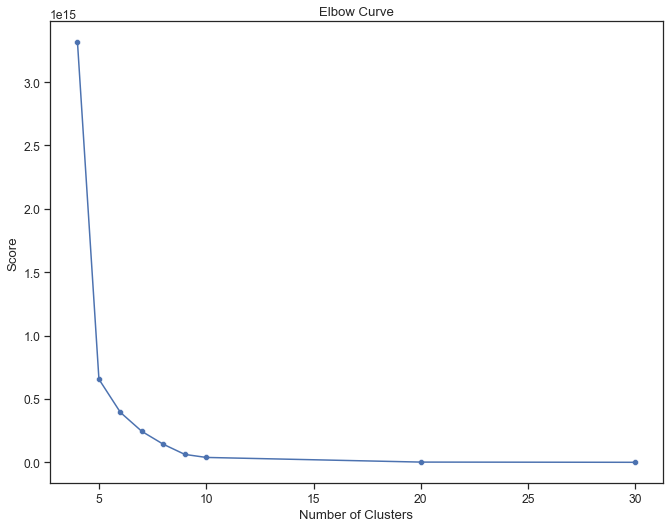

In [63]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

* Se aprecia que para para 10 clusters ya se obtiene un buen resultado. Se decide utilizar 10 clusters.

In [83]:
# ajustar modelo: k-means
from sklearn.cluster import KMeans

X = np.array(df)
kmeans = KMeans(n_clusters=10,n_init=25, random_state=123)
kmeans.fit(X)

centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

# etiquetar los datos con los clusters encontrados
df["cluster"] = clusters
df["cluster"] = df["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=list(df.columns[:-1]))
centroids_df["cluster"] = [1,2,3,4,5,6,7,8,9,10]

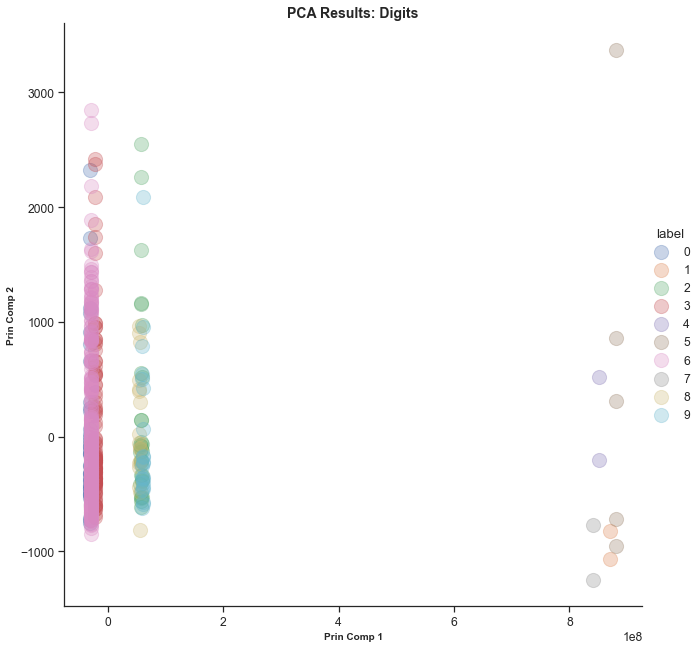

In [84]:
scaler = StandardScaler()

# graficar los datos etiquetados con k-means
from sklearn.decomposition import PCA

pca_num_components = 2
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9','PC10',
              'PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18','PC19','PC20',
              'PC21', 'PC22', 'PC23', 'PC24','PC25', 'PC26', 'PC27', 'PC28','PC29','PC30',
              'PC31', 'PC32']

# Ejecutamos PCA en los datos y reducimos las dimensiones en dimensiones pca_num_components
reduced_data = PCA(n_components=pca_num_components).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=columns[0:pca_num_components])
results['label'] = df['cluster']

# Establecer estilo de diagrama de dispersión
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Crear diagrama de dispersión del conjunto de datos
sns.lmplot(x='PC1',
           y='PC2',
           data=results,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

In [85]:
scaler = StandardScaler()

# Aplicamos la metodología TSNE
embedding = TSNE(n_components=2,init='pca',learning_rate='auto')
X_transform = embedding.fit_transform(df)
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['label'] = df['cluster']

C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


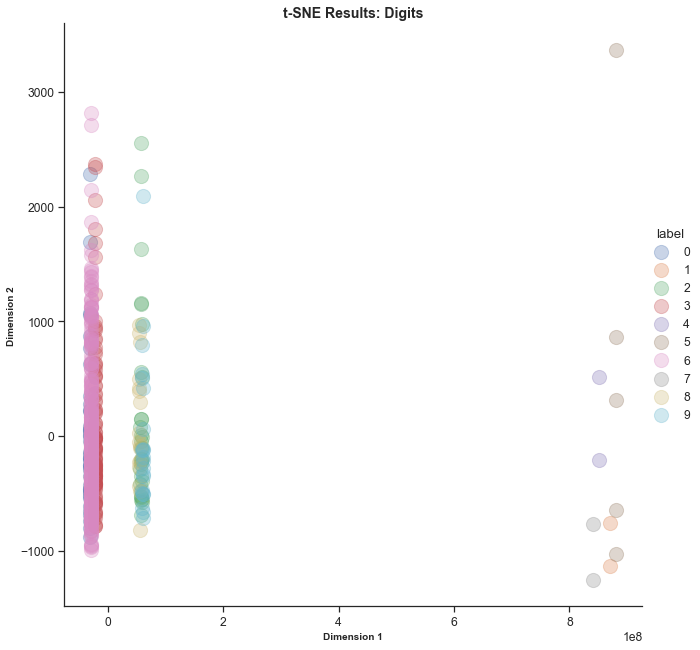

In [86]:
# Graficamos los dígitos TSNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

### 4.-
Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [25]:
# Separamos las columnas objetivo
x_training = df.drop(['diagnosis',], axis=1)
y_training = df['diagnosis']

# Aplicando el algoritmo univariante de prueba F.
k = 15  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
atributos

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [4]:
def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="macro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="macro", labels=np.unique(y_pred)),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="macro"),4)]


    return df_result

In [18]:
# Entrenamiento con todas las variables 
X = df.drop(['diagnosis',], axis=1)
Y = df['diagnosis']

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

# Creando el modelo
rlog = LogisticRegression()
rlog.fit(X_train, Y_train) # ajustando el modelo

predicciones = rlog.predict(X_test)

df_pred = pd.DataFrame({
    'y':Y_test,
    'yhat':predicciones
})

df_s1 = summary_metrics(df_pred).assign(name = 'Todas las variables')

In [17]:
# Entrenamiento con las variables seleccionadas
X = df[atributos]
Y = df['diagnosis']

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

# Creando el modelo
rlog = LogisticRegression()
rlog.fit(X_train, Y_train) # ajustando el modelo

predicciones = rlog.predict(X_test)

df_pred2 = pd.DataFrame({
    'y':Y_test,
    'yhat':predicciones
})

df_s2 = summary_metrics(df_pred2).assign(name = 'Variables Seleccionadas')

In [19]:
# juntar resultados en formato dataframe
pd.concat([df_s1,df_s2])

,accuracy,recall,precision,fscore,name
0,0.6053,0.5000,0.6053,0.3770,Todas las variables
0,0.9123,0.9121,0.9063,0.9089,Variables Seleccionadas


* Se observa que las métricas para el modelo con menos variable resultan ser mejores. Lo cual nos muestra que trabajando con menos variables, se puede captar las características más relevante del problema, y en la medida que se trabaje con más datos, las mejoras a nivel de capacidad de cómputo tendrán un mejor desempeño.

### A continuación, se realizará la búsqueda de los mejores hiperparámetros para varios modelos de regresión
**i) Con todas las variables**

In [26]:
# Entrenamiento con todas las variables 
X = df.drop(['diagnosis',], axis=1)
y = df['diagnosis']

# Se separa en data sets de testeo y de entrenamiento.
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [27]:
def summary_metrics(ytest,xtest,model,name) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true =  list(ytest)
    y_pred = list(model.predict(xtest))
    
    matrix = confusion_matrix(y_true,y_pred)

    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="macro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="macro"),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="macro"),4)]
    df_result['Model'] = name

    return df_result,matrix

**Mejor estimación de los parámetros para LogisticRegression**

In [30]:
inicio = time.time()

name = "Logistic"
# Determinar los parámetros a variar
#tuned_parameters = {'C': [0.001,0.01,0.1,1,10,100,1000]}

pipe = Pipeline([('scale', StandardScaler()),
    ('mnl', LogisticRegression(fit_intercept=True, multi_class="multinomial"))])

param_grid = [{'mnl__solver': ['newton-cg', 'lbfgs','sag', 'saga','liblinear'],
               'mnl__C':[0.001,0.01,0.1,1,10,100,1000],
               'mnl__class_weight':[None,'balanced'],
              'mnl__max_iter':[1000,2000,3000],
              'mnl__penalty':['l1','l2']}]

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
clf = GridSearchCV(estimator = pipe, param_grid=param_grid, scoring='accuracy', n_jobs=-1, refit='neg_log_loss', cv=3, verbose=2, return_train_score=True)

# Ajustar el modelo a los datos de entrenamiento
best_model = clf.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(clf.best_params_)

# Métricas y Matriz de confusión
[df_1,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_1)
print("")

fin = time.time()
t1 = fin-inicio
print(t1) 

Fitting 3 folds for each of 420 candidates, totalling 1260 fits

Los mejores parámetros encontrados son:
 
{'mnl__C': 0.1, 'mnl__class_weight': 'balanced', 'mnl__max_iter': 1000, 'mnl__penalty': 'l2', 'mnl__solver': 'newton-cg'}

Matriz de confusion:
 
[[72  0]
 [ 3 39]]

Metricas:
 
   accuracy  recall  precision  fscore     Model
0    0.9737  0.9643       0.98  0.9713  Logistic

11.835867404937744


C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
630 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
126 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(sel

**Mejor estimación de los parámetros para SVC**

In [33]:
import time
inicio = time.time()

name = "RBF SVM"
# Determinar el rango de C en el que se quiere buscar
Cs = [0.001, 0.01, 0.1 ,1, 10, 100, 1000, 10000]

# Determinar el rango de gammas en el que se quiere buscar
gammas = [0.00000001 ,0.00000001 ,0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1, 10, 100, 1000]

# Crear el diccionario
param_grid = {'C': Cs, 'gamma': gammas}

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
grid_search = GridSearchCV(SVC(kernel='poly'),param_grid,cv=3)

# Ajustar el modelo a los datos de entrenamiento
best_model = grid_search.fit(xtrain,ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(grid_search.best_params_)
    
# Métricas y Matriz de confusión
[df_2,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_2)
print("")

fin = time.time()
t2 = fin-inicio
print(t2) 


Los mejores parámetros encontrados son:
 
{'C': 0.01, 'gamma': 1}

Matriz de confusion:
 
[[70  2]
 [ 6 36]]

Metricas:
 
   accuracy  recall  precision  fscore    Model
0    0.9298  0.9147     0.9342   0.923  RBF SVM

1.6031229496002197


**Mejor estimación de los parámetros para Decision Tree**

In [34]:
import time
inicio = time.time()

name = "Decision Tree"

# Determinar los parámetros a variar
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=3)

# Ajustar el modelo a los datos de entrenamiento
best_model = clf.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(clf.best_params_)

# Métricas y Matriz de confusión
[df_3,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_3)
print("")

fin = time.time()
t3 = fin-inicio
print(t3) 


Los mejores parámetros encontrados son:
 
{'criterion': 'entropy', 'max_depth': 150}

Matriz de confusion:
 
[[72  0]
 [ 6 36]]

Metricas:
 
   accuracy  recall  precision  fscore          Model
0    0.9474  0.9286     0.9615  0.9415  Decision Tree

0.4140353202819824


**Mejor estimación de los parámetros para Random forest**

In [35]:
import time
inicio = time.time()

name = "Random Forest"

# Determinar los parámetros a variar
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)

# Ajustar el modelo a los datos de entrenamiento
best_model = CV_rfc.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(CV_rfc.best_params_)

# Métricas y Matriz de confusión
[df_4,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_4)
print("")

fin = time.time()
t4 = fin-inicio
print(t4) 


Los mejores parámetros encontrados son:
 
{'max_features': 'log2', 'n_estimators': 700}

Matriz de confusion:
 
[[71  1]
 [ 5 37]]

Metricas:
 
   accuracy  recall  precision  fscore          Model
0    0.9474  0.9335     0.9539  0.9422  Random Forest

10.940239429473877


**Mejor estimación de los parámetros para KNeighbors**

In [36]:
import time
inicio = time.time()

name = "KNeighbors"

# Determinar los parámetros a variar
nFolds = 3
metrics       = ['minkowski','euclidean','manhattan'] 
weights       = ['uniform','distance'] #10.0**np.arange(-5,4)
numNeighbors  = np.arange(5,10)

# Crear el diccionario
param_grid    = dict(metric=metrics,weights=weights,n_neighbors=numNeighbors)

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=nFolds)

# Ajustar el modelo a los datos de entrenamiento
best_model = grid.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(grid.best_params_)

# Métricas y Matriz de confusión
[df_5,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_5)
print("")

fin = time.time()
t5 = fin-inicio
print(t5) 


Los mejores parámetros encontrados son:
 
{'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'distance'}

Matriz de confusion:
 
[[71  1]
 [ 5 37]]

Metricas:
 
   accuracy  recall  precision  fscore       Model
0    0.9474  0.9335     0.9539  0.9422  KNeighbors

0.4448108673095703


**Resumen de resultados**

In [40]:
result = pd.concat([df_1,df_2,df_3,df_4,df_5], sort='True', ignore_index='True')
result

,Model,accuracy,fscore,precision,recall
0,Logistic,0.9737,0.9713,0.9800,0.9643
1,RBF SVM,0.9298,0.9230,0.9342,0.9147
2,Decision Tree,0.9474,0.9415,0.9615,0.9286
3,Random Forest,0.9474,0.9422,0.9539,0.9335
4,KNeighbors,0.9474,0.9422,0.9539,0.9335


**Tiempos de Simulación**

In [38]:
Tiempo = pd.DataFrame()
Tiempo['Modelo'] = ["Logistic","RBF SVM","Decision Tree","Random Forest","KNeighbors"]
Tiempo['Tiempo [s]']=[t1,t2,t3,t4,t5]
Tiempo.sort_values(['Tiempo [s]'],ascending=False)

,Modelo,Tiempo [s]
0,Logistic,11.835867
3,Random Forest,10.940239
1,RBF SVM,1.603123
4,KNeighbors,0.444811
2,Decision Tree,0.414035


**ii) Con las variables seleccionadas**

In [41]:
# Entrenamiento con todas las variables 
X = df[atributos]
y = df['diagnosis']

# Se separa en data sets de testeo y de entrenamiento.
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

**Mejor estimación de los parámetros para LogisticRegression**

In [42]:
inicio = time.time()

name = "Logistic"
# Determinar los parámetros a variar
#tuned_parameters = {'C': [0.001,0.01,0.1,1,10,100,1000]}

pipe = Pipeline([('scale', StandardScaler()),
    ('mnl', LogisticRegression(fit_intercept=True, multi_class="multinomial"))])

param_grid = [{'mnl__solver': ['newton-cg', 'lbfgs','sag', 'saga','liblinear'],
               'mnl__C':[0.001,0.01,0.1,1,10,100,1000],
               'mnl__class_weight':[None,'balanced'],
              'mnl__max_iter':[1000,2000,3000],
              'mnl__penalty':['l1','l2']}]

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
clf = GridSearchCV(estimator = pipe, param_grid=param_grid, scoring='accuracy', n_jobs=-1, refit='neg_log_loss', cv=3, verbose=2, return_train_score=True)

# Ajustar el modelo a los datos de entrenamiento
best_model = clf.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(clf.best_params_)

# Métricas y Matriz de confusión
[df_6,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_6)
print("")

fin = time.time()
t6 = fin-inicio
print(t6) 

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
630 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
126 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(sel


Los mejores parámetros encontrados son:
 
{'mnl__C': 100, 'mnl__class_weight': 'balanced', 'mnl__max_iter': 3000, 'mnl__penalty': 'l1', 'mnl__solver': 'saga'}

Matriz de confusion:
 
[[70  2]
 [ 5 37]]

Metricas:
 
   accuracy  recall  precision  fscore     Model
0    0.9386  0.9266      0.941   0.933  Logistic

9.982069969177246


C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Mejor estimación de los parámetros para SVC**

In [43]:
import time
inicio = time.time()

name = "RBF SVM"
# Determinar el rango de C en el que se quiere buscar
Cs = [0.001, 0.01, 0.1 ,1, 10, 100, 1000, 10000]

# Determinar el rango de gammas en el que se quiere buscar
gammas = [0.00000001 ,0.00000001 ,0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1, 10, 100, 1000]

# Crear el diccionario
param_grid = {'C': Cs, 'gamma': gammas}

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
grid_search = GridSearchCV(SVC(kernel='poly'),param_grid,cv=3)

# Ajustar el modelo a los datos de entrenamiento
best_model = grid_search.fit(xtrain,ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(grid_search.best_params_)
    
# Métricas y Matriz de confusión
[df_7,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_7)
print("")

fin = time.time()
t7 = fin-inicio
print(t7) 


Los mejores parámetros encontrados son:
 
{'C': 0.001, 'gamma': 100}

Matriz de confusion:
 
[[67  5]
 [ 4 38]]

Metricas:
 
   accuracy  recall  precision  fscore    Model
0    0.9211  0.9177     0.9137  0.9156  RBF SVM

1.6698122024536133


**Mejor estimación de los parámetros para Decision Tree**

In [44]:
import time
inicio = time.time()

name = "Decision Tree"

# Determinar los parámetros a variar
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=3)

# Ajustar el modelo a los datos de entrenamiento
best_model = clf.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(clf.best_params_)

# Métricas y Matriz de confusión
[df_8,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_8)
print("")

fin = time.time()
t8 = fin-inicio
print(t8) 


Los mejores parámetros encontrados son:
 
{'criterion': 'gini', 'max_depth': 150}

Matriz de confusion:
 
[[69  3]
 [ 8 34]]

Metricas:
 
   accuracy  recall  precision  fscore          Model
0    0.9035  0.8839     0.9075  0.8935  Decision Tree

0.2640523910522461


**Mejor estimación de los parámetros para Random forest**

In [46]:
import time
inicio = time.time()

name = "Random Forest"

# Determinar los parámetros a variar
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)

# Ajustar el modelo a los datos de entrenamiento
best_model = CV_rfc.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(CV_rfc.best_params_)

# Métricas y Matriz de confusión
[df_9,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_9)
print("")

fin = time.time()
t9 = fin-inicio
print(t9) 


Los mejores parámetros encontrados son:
 
{'max_features': 'auto', 'n_estimators': 700}

Matriz de confusion:
 
[[71  1]
 [ 5 37]]

Metricas:
 
   accuracy  recall  precision  fscore          Model
0    0.9474  0.9335     0.9539  0.9422  Random Forest

10.287871360778809


**Mejor estimación de los parámetros para KNeighbors**

In [47]:
import time
inicio = time.time()

name = "KNeighbors"

# Determinar los parámetros a variar
nFolds = 3
metrics       = ['minkowski','euclidean','manhattan'] 
weights       = ['uniform','distance'] #10.0**np.arange(-5,4)
numNeighbors  = np.arange(5,10)

# Crear el diccionario
param_grid    = dict(metric=metrics,weights=weights,n_neighbors=numNeighbors)

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=nFolds)

# Ajustar el modelo a los datos de entrenamiento
best_model = grid.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(grid.best_params_)

# Métricas y Matriz de confusión
[df_10,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_10)
print("")

fin = time.time()
t10 = fin-inicio
print(t10) 


Los mejores parámetros encontrados son:
 
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

Matriz de confusion:
 
[[71  1]
 [ 5 37]]

Metricas:
 
   accuracy  recall  precision  fscore       Model
0    0.9474  0.9335     0.9539  0.9422  KNeighbors

0.41718435287475586


In [52]:
names = ["Logistic Sel. Var","RBF SVM Sel. Var","Decision Tree Sel. Var","Random Forest Sel. Var","KNeighbors Sel. Var"]
result2 = pd.concat([df_6,df_7,df_8,df_9,df_10], sort='True', ignore_index='True')
result2['Model'] = names
result2

,Model,accuracy,fscore,precision,recall
0,Logistic Sel. Var,0.9386,0.9330,0.9410,0.9266
1,RBF SVM Sel. Var,0.9211,0.9156,0.9137,0.9177
2,Decision Tree Sel. Var,0.9035,0.8935,0.9075,0.8839
3,Random Forest Sel. Var,0.9474,0.9422,0.9539,0.9335
4,KNeighbors Sel. Var,0.9474,0.9422,0.9539,0.9335


In [49]:
Tiempo2 = pd.DataFrame()
Tiempo2['Modelo'] = ["Logistic Sel. Var","RBF SVM Sel. Var","Decision Tree Sel. Var","Random Forest Sel. Var","KNeighbors Sel. Var"]
Tiempo2['Tiempo [s]']=[t6,t7,t8,t9,t10]
Tiempo2.sort_values(['Tiempo [s]'],ascending=False)

,Modelo,Tiempo [s]
3,Random Forest Sel. Var,10.287871
0,Logistic Sel. Var,9.982070
1,RBF SVM Sel. Var,1.669812
4,KNeighbors Sel. Var,0.417184
2,Decision Tree Sel. Var,0.264052


**Se unen los conjuntos de datos con las métricas y los tiempos**

In [60]:
# Unir data frames
result_final = pd.concat([result,result2], sort='True', ignore_index='True')
result_final.sort_values(['accuracy','fscore','precision','recall'],ascending=False).reset_index()

,index,Model,accuracy,fscore,precision,recall
0,0,Logistic,0.9737,0.9713,0.9800,0.9643
1,3,Random Forest,0.9474,0.9422,0.9539,0.9335
2,4,KNeighbors,0.9474,0.9422,0.9539,0.9335
3,8,Random Forest Sel. Var,0.9474,0.9422,0.9539,0.9335
4,9,KNeighbors Sel. Var,0.9474,0.9422,0.9539,0.9335
5,2,Decision Tree,0.9474,0.9415,0.9615,0.9286
6,5,Logistic Sel. Var,0.9386,0.9330,0.9410,0.9266
7,1,RBF SVM,0.9298,0.9230,0.9342,0.9147
8,6,RBF SVM Sel. Var,0.9211,0.9156,0.9137,0.9177
9,7,Decision Tree Sel. Var,0.9035,0.8935,0.9075,0.8839


* Se observa que:
    * El modelo con las mejores métricas se obtuvo utilizando todos los datos. Esto ocurre para cada modelo utilizado, con todos los datos se obtienen mejores métricas.
    * De igual forma, es posible obtener buenos resultados con variables seleccionadas. Se observan las mismas métricas para los modelos 2 al 4.
    * Si consideramos, por ejemplo, el modelo KNeighbors con variables seleccionadas, se logra una exactitud de 0.9474, versus un 0.9737 del mejor modelo, esto es solo  un 2.7% de diferencia. Para este ejemplo, tanto con variables seleccionadas, como con todas las variables se obtienen las mismas métricas.
    

In [61]:
Tiempo_final = pd.concat([Tiempo,Tiempo2], sort='True', ignore_index='True')
Tiempo_final.sort_values(['Tiempo [s]'],ascending=False).reset_index()

,index,Modelo,Tiempo [s]
0,0,Logistic,11.835867
1,3,Random Forest,10.940239
2,8,Random Forest Sel. Var,10.287871
3,5,Logistic Sel. Var,9.982070
4,6,RBF SVM Sel. Var,1.669812
5,1,RBF SVM,1.603123
6,4,KNeighbors,0.444811
7,9,KNeighbors Sel. Var,0.417184
8,2,Decision Tree,0.414035
9,7,Decision Tree Sel. Var,0.264052


* Respecto a los tiempos se puede decir que:
    * El mejor modelo es el cuál utiliza más tiempo de cálculo.
    * Considerando esto, el modelo KNeighbors con variables seleccionadas resulta ser el cuál entrega mejores resultados en el menor tiempo.
    